In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [2]:
df.head(15)

,label,text
0,4,"Any time I want sushi, Yama is the place to go..."
1,4,People stop ordering TexMex type foods here. T...
2,0,We were greeted at the door so that was nice. ...
3,4,I actually found Lychee liquor there! Need I ...
4,4,"Thank you, Barrymore for hosting our wedding ..."
5,4,Got a small taro snow with red bean and conden...
6,4,"When my husband and I first moved here, we saw..."
7,4,I don't know why the other review was so disap...
8,4,This place is super packed on Saturday & Sunda...
9,4,The food and the service was great. A good kic...


In [3]:
df.shape

(100000, 2)

In [4]:
sentiment_mapping = {
    0: 'negative',
    4: 'positive'
}
df['label'] = df['label'].map(sentiment_mapping)


In [ ]:
df

In [6]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [7]:
df['label'].value_counts()

positive    50000
negative    50000
Name: label, dtype: int64

In [8]:
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)       # Remove URLs
    text = re.sub(r'@[\w]+', '', text)        # Remove usernames
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text)          # Remove extra whitespaces
    text = text.lower()                       # Convert to lowercase
    tokens = word_tokenize(text)               # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Negated sentence transformation function
import spacy
nlp = spacy.load("en_core_web_sm")

def negate_sentence(sentence):
    # Parse the sentence with spacy
    doc = nlp(sentence)

    # Initialize a set to store tokens affected by negation
    negated_tokens = set()

    # Iterate over tokens in the sentence
    for token in doc:
        # If the token is a negation
        if token.dep_ == "neg":
            # Mark the token and its descendants as negated
            negated_tokens.add(token)
            for child in token.children:
                negated_tokens.add(child)
            for ancestor in token.ancestors:
                negated_tokens.add(ancestor)

    # Transform each token in the sentence, marking negated tokens with "not_"
    result = ["not_" + token.text if token in negated_tokens else token.text for token in doc]

    # Join the transformed tokens with spaces and return the transformed sentence
    return " ".join(result)

In [10]:
df['text'] = df['text'].apply(negate_sentence)

In [11]:
df['text'] = df['text'].apply(clean_text)

In [42]:
print(df.head(15))

       label                                               text
0   positive  time want sushi yama place go roll excel eat d...
1   positive  peopl stop order texmex type food mexico citi ...
2   negative  greet door nice wait patient associ get shirt ...
3   positive  actual found lyche liquor need say morenny wou...
4   positive  thank barrymor host wed recept gold room every...
5   positive  got small taro snow red bean condens milk deli...
6   positive  husband first move saw place laugh sushi fever...
7   positive  notnt notknow review disappoint teppan onion v...
8   positive  place super pack saturday sunday morn rain shi...
9   positive  food servic great good kick spot friend famili...
10  negative  restaur mediocr chines type best order green c...
11  negative  fukuda close lomito south american restaur nnn...
12  negative  first notnt notcarri tall size american get ta...
13  negative  arriv hotel went lucki bar play video poker dr...
14  negative  super pawn town one worst 

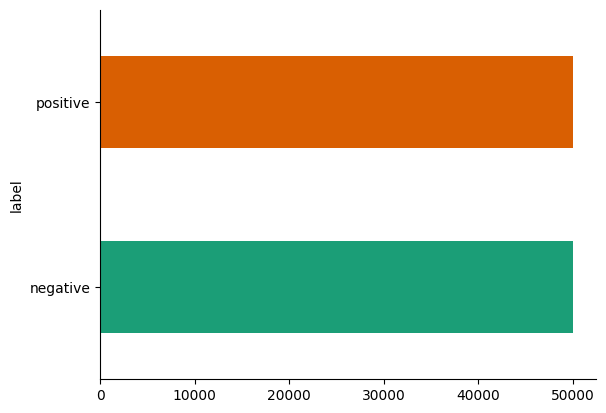

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
df.to_csv('preprocessed_final.csv', index=False)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from gensim.models import Word2Vec


In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features=25000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

In [15]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42 )

In [16]:
print(X_train_tfidf.shape,X_test_tfidf.shape)

(80000, 25000) (20000, 25000)


In [17]:
print(X_train_tfidf)

  (0, 5969)	0.1441124400132108
  (0, 9832)	0.3277607048657763
  (0, 9494)	0.13079591831156706
  (0, 9167)	0.15776558568533688
  (0, 23854)	0.1469376847525478
  (0, 5990)	0.12692297891949317
  (0, 14200)	0.1562811218117381
  (0, 13087)	0.129823354132807
  (0, 7866)	0.13079591831156706
  (0, 13363)	0.2927780491438157
  (0, 24320)	0.12267012521121548
  (0, 12522)	0.1391810028797198
  (0, 24541)	0.1455969038868096
  (0, 9650)	0.14932177544563735
  (0, 17268)	0.15725668927455047
  (0, 17267)	0.11184555521418912
  (0, 16753)	0.104815647545787
  (0, 7789)	0.09910122522527211
  (0, 6373)	0.1217836298619266
  (0, 4420)	0.10679509595100836
  (0, 3698)	0.09548225160887187
  (0, 14725)	0.0911563497750108
  (0, 15318)	0.08033342894633098
  (0, 1934)	0.10805695048957846
  (0, 4059)	0.1026525792824017
  :	:
  (79999, 2122)	0.20105341040538752
  (79999, 174)	0.17848926459850692
  (79999, 4917)	0.1423268588755399
  (79999, 14129)	0.1691007182828566
  (79999, 13925)	0.16470413592970262
  (79999, 24432)	

In [18]:
print(y_train)

75220    positive
48955    negative
44966    negative
13568    negative
92727    negative
           ...   
6265     positive
54886    positive
76820    positive
860      positive
15795    negative
Name: label, Length: 80000, dtype: object


In [19]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9664
Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.97      0.97      9922
    positive       0.97      0.96      0.97     10078

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [20]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)
y_pred = rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9428
Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.96      0.94      9922
    positive       0.96      0.93      0.94     10078

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Accuracy:", accuracy_nb)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy: 0.949
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.96      0.95      9922
    positive       0.96      0.94      0.95     10078

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [22]:
import joblib
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(nb_model, 'multinomial_nb_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [28]:
custom_input = "i recommend this product . very happy"

cleaned_custom_input = negate_sentence(custom_input)
cleaned_custom_input = clean_text(cleaned_custom_input)
tfidf_custom_input = tfidf_vectorizer.transform([cleaned_custom_input])
sentiment1 = lr_model.predict(tfidf_custom_input)[0]
sentiment2 = nb_model.predict(tfidf_custom_input)[0]
sentiment3 = rf_model.predict(tfidf_custom_input)[0]

print("Predicted Sentiment:", sentiment1)
print("Predicted Sentiment:", sentiment2)
print("Predicted Sentiment:", sentiment3)



Predicted Sentiment: positive
Predicted Sentiment: positive
Predicted Sentiment: positive


In [39]:
custom_input = "i will  recommend this product . its wasn't working properly"
cleaned_custom_input = negate_sentence(custom_input)
cleaned_custom_input = clean_text(cleaned_custom_input)
tfidf_custom_input = tfidf_vectorizer.transform([cleaned_custom_input])
sentiment1 = lr_model.predict(tfidf_custom_input)[0]
sentiment2 = nb_model.predict(tfidf_custom_input)[0]
sentiment3 = rf_model.predict(tfidf_custom_input)[0]

print("Predicted Sentiment:", sentiment1)
print("Predicted Sentiment:", sentiment2)
print("Predicted Sentiment:", sentiment3)



Predicted Sentiment: positive
Predicted Sentiment: negative
Predicted Sentiment: negative


# New Section